In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
titanic_train=pd.read_csv('train.csv')
titanic_test=pd.read_csv('test.csv')

In [6]:
print(titanic_train.shape)
print(titanic_test.shape)

(891, 12)
(418, 11)


In [7]:
titanic_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [8]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [11]:
titanic_train.drop(columns=['Cabin'],inplace=True)
titanic_test.drop(columns=['Cabin'],inplace=True)

In [12]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [13]:
titanic_test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [14]:
titanic_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [15]:
titanic_train['Embarked'].fillna('S',inplace=True)

In [16]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [17]:
titanic_test['Fare'].fillna(titanic_test['Fare'].mean(),inplace=True)

In [18]:
titanic_test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
dtype: int64

In [21]:
train_age=np.random.randint(titanic_train['Age'].mean()-titanic_train['Age'].std(), titanic_train['Age'].mean()+titanic_train['Age'].std(),177)

In [22]:
test_age=np.random.randint(titanic_test['Age'].mean()-titanic_test['Age'].std(), titanic_test['Age'].mean()+titanic_test['Age'].std(),86)

In [27]:
titanic_train['Age'][titanic_train['Age'].isnull()]=train_age

C:\Users\skond\AppData\Local\Temp\ipykernel_12872\610729215.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_train['Age'][titanic_train['Age'].isnull()]=train_age


In [28]:
titanic_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [30]:
titanic_test['Age'][titanic_test['Age'].isnull()]=test_age

C:\Users\skond\AppData\Local\Temp\ipykernel_12872\191924061.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_test['Age'][titanic_test['Age'].isnull()]=test_age


In [31]:
titanic_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [32]:
#EDA

In [44]:
titanic_train.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [45]:
titanic_train.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [47]:
titanic_train.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

<Axes: xlabel='Age', ylabel='Count'>

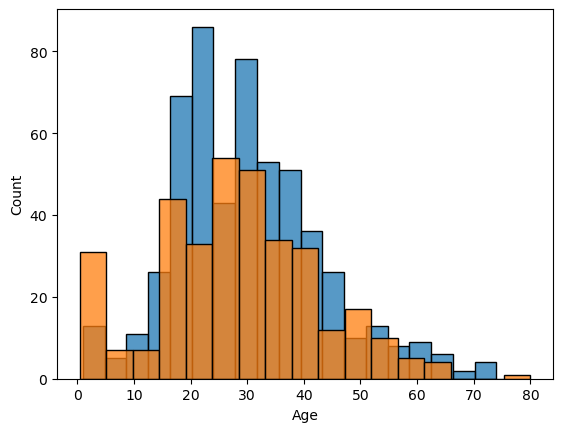

In [75]:
sns.histplot(titanic_train['Age'][titanic_train['Survived']==0])
sns.histplot(titanic_train['Age'][titanic_train['Survived']==1])

<Axes: xlabel='Fare', ylabel='Count'>

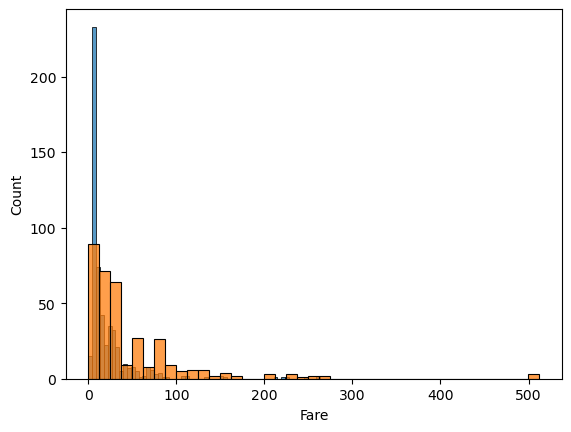

In [74]:
sns.histplot(titanic_train['Fare'][titanic_train['Survived']==0])
sns.histplot(titanic_train['Fare'][titanic_train['Survived']==1])

In [59]:
titanic_train.drop(columns=['Ticket'],inplace=True)
titanic_test.drop(columns=['Ticket'],inplace=True)

In [61]:
titanic_train['family']=titanic_train['SibSp']+titanic_train['Parch']+1

In [66]:
titanic_test['family']=titanic_test['SibSp']+titanic_test['Parch']+1

In [63]:
titanic_train.groupby(['family'])['Survived'].mean()

family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [67]:
def cal(number):
    if number==1:
        return "Alone"
    elif number>1 and number<5:
        return "Medium"
    else:
        return "Large"

In [68]:
titanic_train['family_size']=titanic_train['family'].apply(cal)
titanic_test['family_size']=titanic_test['family'].apply(cal)

In [69]:
titanic_train.drop(columns=['SibSp','Parch','family'],inplace=True)
titanic_test.drop(columns=['SibSp','Parch','family'],inplace=True)

In [70]:
print(titanic_train.shape)
print(titanic_test.shape)

(891, 9)
(418, 8)


In [71]:
passengerID=titanic_test['PassengerId'].values

In [72]:
titanic_train.drop(columns=['Name','PassengerId'],inplace=True)
titanic_test.drop(columns=['Name','PassengerId'],inplace=True)

In [73]:
titanic_train.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
family_size    0
dtype: int64

In [84]:
titanic_train.head()

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_size_Large,family_size_Medium
0,0,22.0,7.2500,0,1,1,0,1,0,1
1,1,38.0,71.2833,0,0,0,0,0,0,1
2,1,26.0,7.9250,0,1,0,0,1,0,0
3,1,35.0,53.1000,0,0,0,0,1,0,1
4,0,35.0,8.0500,0,1,1,0,1,0,0


In [81]:
titanic_train=pd.get_dummies(titanic_train, columns=['Pclass','Sex','Embarked','family_size'],drop_first=True)

In [82]:
titanic_train.shape

(891, 10)

In [85]:
titanic_test=pd.get_dummies(titanic_test, columns=['Pclass','Sex','Embarked','family_size'],drop_first=True)

In [86]:
titanic_test.shape

(418, 9)

In [88]:
X=titanic_train.iloc[:,1:].values
Y=titanic_train.iloc[:,0].values

In [89]:
#Split

In [93]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [95]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()

In [97]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [98]:
y_pred=classifier.predict(X_test)

In [99]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.7486033519553073

In [101]:
Xf=titanic_test.iloc[:,:].values

In [102]:
y_final=classifier.predict(Xf)

In [103]:
final=pd.DataFrame()

In [104]:
final

""


In [107]:
final['passengerId']=passengerID
final['survived']=y_final

In [108]:
final

,passengerId,survived
0,892,0
1,893,1
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [111]:
final.to_csv('submission.csv',index=False)